# Import the dependencies

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Data Collection and Data Prediction

In [21]:
sonar_data = pd.read_csv(r"C:\Users\KodavatiGeetanjali\Desktop\ML\Sumbarine\Sonar data.csv", header=None)

In [23]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [27]:
sonar_data.shape

(208, 61)

In [33]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [37]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [39]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## Seperating data and labels

In [44]:
X = sonar_data.drop(columns=60, axis=2)
Y = sonar_data[60]

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [48]:
Y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

# Training and Test

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


## Model Training

In [58]:
model = LogisticRegression()

In [60]:
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

In [69]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

In [71]:
print(training_data_accuracy)

0.8342245989304813


In [77]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

In [79]:
print(test_data_accuracy)

0.7619047619047619


## Making SVM model

In [85]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, Y_train)

SVC()

In [87]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

In [89]:
print(training_data_accuracy)

0.8823529411764706


In [91]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

In [93]:
print(test_data_accuracy)

0.8095238095238095


## Making Stochastic Gradient Descent Model

In [96]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, Y_train)

SGDClassifier()

In [98]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

print(training_data_accuracy)

0.8342245989304813


In [100]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

print(test_data_accuracy)

0.8095238095238095


## Making KNN Model

In [103]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [105]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

print(training_data_accuracy)

0.839572192513369


In [107]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

print(test_data_accuracy)

0.8095238095238095


## Making Gaussian Naive Bayes Model

In [111]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [113]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

print(training_data_accuracy)

0.7593582887700535


In [115]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

print(test_data_accuracy)

0.6190476190476191


# Making Decision Tree Model

In [118]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [120]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

print(training_data_accuracy)

1.0


In [122]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

print(test_data_accuracy)

0.7142857142857143


# Making Random Forest Model

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [127]:
X_train_preds = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_preds, Y_train)

print(training_data_accuracy)

1.0


In [129]:
X_test_preds = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_preds, Y_test)

print(test_data_accuracy)

0.7142857142857143


## Making Many Models

In [189]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Standarizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Initializing the model
log_reg = LogisticRegression(max_iter=200)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn5 = KNeighborsClassifier()
knn3 = KNeighborsClassifier(n_neighbors=3)
knn10 = KNeighborsClassifier(n_neighbors=10)
svm = SVC()
naive_bayes = GaussianNB()
dummy = DummyClassifier(strategy="uniform")

# Train models
log_reg.fit(X_train_scaled, Y_train)
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
knn5.fit(X_train_scaled, Y_train)
knn3.fit(X_train_scaled, Y_train)
knn10.fit(X_train_scaled, Y_train)
svm.fit(X_train_scaled, Y_train)
naive_bayes.fit(X_train, Y_train)
dummy.fit(X_train, Y_train)

# Predict on the train set
log_reg_pred_train       = log_reg.predict(X_train_scaled)
decision_tree_pred_train = decision_tree.predict(X_train)
random_forest_pred_train = random_forest.predict(X_train)
knn5_pred_train          = knn5.predict(X_train_scaled)
knn3_pred_train          = knn3.predict(X_train_scaled)
knn10_pred_train         = knn10.predict(X_train_scaled)
svm_pred_train           = svm.predict(X_train_scaled)
naive_bayes_pred_train   = naive_bayes.predict(X_train)
dummy_pred_train         = dummy.predict(X_train_scaled)

# Predict on the test set
log_reg_pred       = log_reg.predict(X_test_scaled)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
knn5_pred          = knn5.predict(X_test_scaled)
knn3_pred          = knn3.predict(X_test_scaled)
knn10_pred         = knn10.predict(X_test_scaled)
svm_pred           = svm.predict(X_test_scaled)
naive_bayes_pred   = naive_bayes.predict(X_test)
dummy_pred         = dummy.predict(X_test_scaled)

# Evaluate models using accuracy

train_results = {
    "Logistic Regression": accuracy_score(Y_train, log_reg_pred_train),
    "Decision Tree": accuracy_score(Y_train, decision_tree_pred_train),
    "Random Forest": accuracy_score(Y_train, random_forest_pred_train),
    "k-NN5": accuracy_score(Y_train, knn5_pred_train),
    "k-NN3": accuracy_score(Y_train, knn3_pred_train),
    "k-NN10": accuracy_score(Y_train, knn10_pred_train),
    "SVM": accuracy_score(Y_train, svm_pred_train),
    "Naive Bayes": accuracy_score(Y_train, naive_bayes_pred_train),
    "Baseline": accuracy_score(Y_train, dummy_pred_train)
}

test_results = {
    "Logistic Regression": accuracy_score(Y_test, log_reg_pred),
    "Decision Tree": accuracy_score(Y_test, decision_tree_pred),
    "Random Forest": accuracy_score(Y_test, random_forest_pred),
    "k-NN5": accuracy_score(Y_test, knn5_pred),
    "k-NN3": accuracy_score(Y_test, knn3_pred),
    "k-NN10": accuracy_score(Y_test, knn10_pred),
    "SVM": accuracy_score(Y_test, svm_pred),
    "Naive Bayes": accuracy_score(Y_test, naive_bayes_pred),
    "Baseline": accuracy_score(Y_test, dummy_pred)
}


In [191]:
train_results_df = pd.DataFrame(list(train_results.items()), columns=['Model', 'Accuracy'])

print(train_results_df)

                 Model  Accuracy
0  Logistic Regression  0.919786
1        Decision Tree  1.000000
2        Random Forest  1.000000
3                k-NN5  0.898396
4                k-NN3  0.967914
5               k-NN10  0.807487
6                  SVM  0.978610
7          Naive Bayes  0.759358
8             Baseline  0.572193


In [193]:
test_results_df = pd.DataFrame(list(test_results.items()), columns=['Model', 'Accuracy'])

print(test_results_df.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy
4                k-NN3  0.952381
3                k-NN5  0.857143
1        Decision Tree  0.809524
2        Random Forest  0.809524
6                  SVM  0.809524
5               k-NN10  0.761905
0  Logistic Regression  0.714286
7          Naive Bayes  0.619048
8             Baseline  0.285714


## Plotting the graph

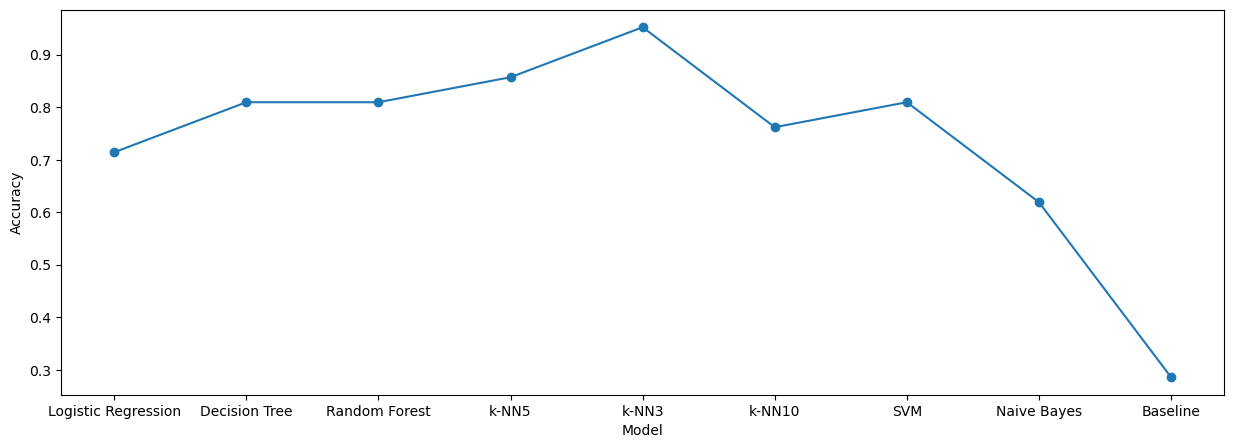

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(test_results_df['Model'], test_results_df['Accuracy'], marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')

#plt.xlim(0.8, 1.0)

plt.show()

# Cross Validation

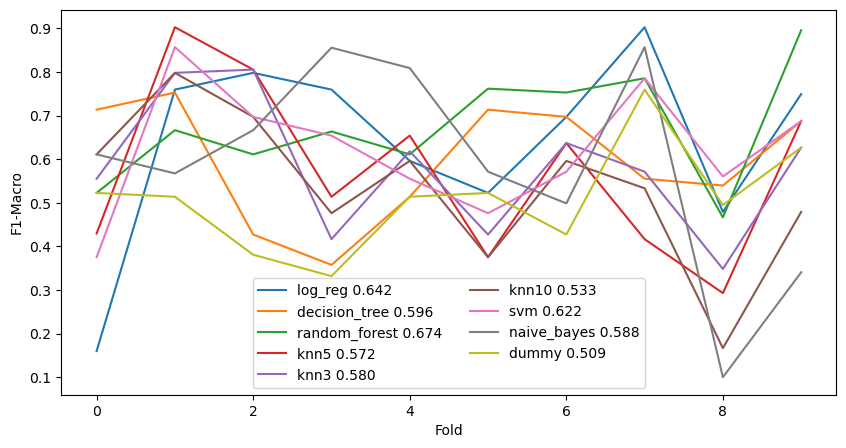

In [267]:
from sklearn.model_selection import cross_val_score

# Define the models
models = {'log_reg'       : LogisticRegression(max_iter=200),
          'decision_tree' : DecisionTreeClassifier(),
          'random_forest' : RandomForestClassifier(),
          'knn5'          : KNeighborsClassifier(),
          'knn3'          : KNeighborsClassifier(n_neighbors=3),
          'knn10'         : KNeighborsClassifier(n_neighbors=10),
          'svm'           : SVC(),
          'naive_bayes'   : GaussianNB(),
          'dummy'         : DummyClassifier(strategy="uniform")}

# Store cross-validation results
cv_results = {
    'Model' : [],
    'Mean CV Scores' : [],
    'CV Scores' : []
}

fig, ax = plt.subplots(figsize=(10,5))
# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=10, scoring='f1_macro')
    cv_results['Model'].append(name)
    cv_results['Mean CV Scores'].append(np.mean(scores))
    cv_results['CV Scores'].append(scores)

    # Label with mean F1-Macro score
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    
    # Plot results
    ax.plot(cv_scores, label=my_lbl)
    
# Set axis labels and limits
#ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('F1-Macro')

# Add legend
ax.legend(loc='lower center', ncol=2)

# Display plot
plt.show()

In [269]:
results_df = pd.DataFrame(cv_results)

# Display the results
print(results_df)

           Model  Mean CV Scores  \
0        log_reg        0.642484   
1  decision_tree        0.642484   
2  random_forest        0.642484   
3           knn5        0.642484   
4           knn3        0.642484   
5          knn10        0.642484   
6            svm        0.642484   
7    naive_bayes        0.642484   
8          dummy        0.642484   

                                           CV Scores  
0  [0.16, 0.7597254004576659, 0.7980769230769231,...  
1  [0.16, 0.7597254004576659, 0.7980769230769231,...  
2  [0.16, 0.7597254004576659, 0.7980769230769231,...  
3  [0.16, 0.7597254004576659, 0.7980769230769231,...  
4  [0.16, 0.7597254004576659, 0.7980769230769231,...  
5  [0.16, 0.7597254004576659, 0.7980769230769231,...  
6  [0.16, 0.7597254004576659, 0.7980769230769231,...  
7  [0.16, 0.7597254004576659, 0.7980769230769231,...  
8  [0.16, 0.7597254004576659, 0.7980769230769231,...  
